  <td>
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />

# *Tensorflow'a Giriş*
### Yunus Serhat Bıçakçı, PhD
### https://linktr.ee/yunusserhat 

### Araç Gereçler

Bu çalışmada kodlama için [python](https://www.python.org/) programalama dilini kullanacağız. [Python](https://www.python.org/) makine öğrenmesinde en sık kullanılan yazılım dili olarak karşımıza çıkmaktadır. 

Bu dökümanı açık kaynaklı bir kütüphane olan [jupyter](https://jupyter.org/) notebook üzerinde [Google Colab](https://research.google.com/colaboratory/) ile çalıştırabilirsiniz. 

Döküman hazırlanırken [Tensorflow](https://www.tensorflow.org/) kendi web sitesinden ve [Laurence Moroney](https://www.coursera.org/learn/introduction-tensorflow)'in kurslarından yararlanılmıştır. 

# Makine Öğrenmesi

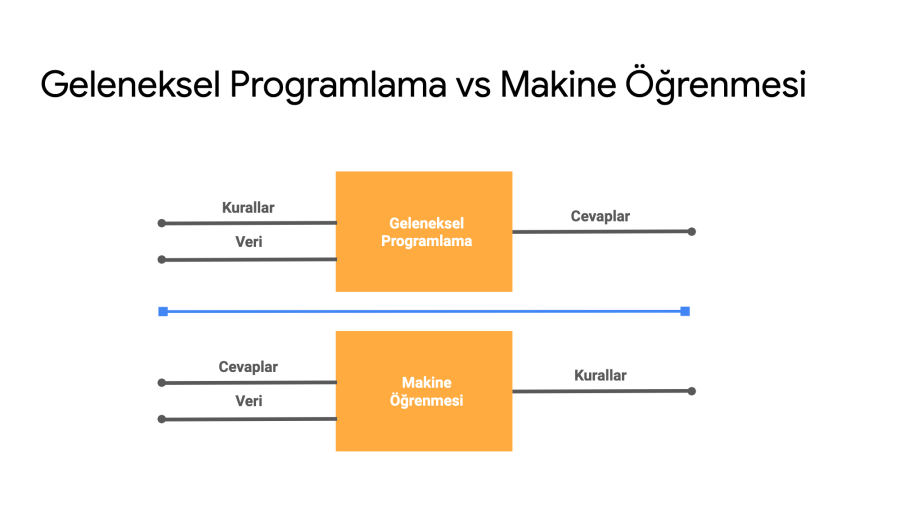

# Tensorflow Nedir?

TensorFlow, Google tarafından geliştirilen bir açık kaynak kodlu makine öğrenme kütüphanesidir. Bu kütüphane, derin öğrenme ve diğer makine öğrenme modellerini oluşturmak, eğitmek ve dağıtmak için kullanılabilir. TensorFlow, Python ve diğer dillerle birlikte kullanılabilir ve küçük ve büyük ölçekli sistemlerde etkin bir şekilde çalışabilir ([ChatGPT](https://chat.openai.com/chat), 2022).


In [ ]:
# Tensorflow ve ilgili diğer kütüphaneleri yükleme

import tensorflow as tf 
import numpy as np
from tensorflow import keras 

In [ ]:
# TF sürüm kontrolu

print("TensorFlow versiyonu:", tf.__version__)

TensorFlow versiyonu: 2.9.2


## Tensor? 

TensorFlow aslında "tf.Tensor" nesneleri olarak temsil edilen çok boyutlu diziler veya tensörler üzerinde çalışır.

In [ ]:
rank_0_tensor = tf.constant(1)
print("Scalar veya rank-0 tensor örneği:",rank_0_tensor)
print("")

rank_1_tensor = tf.constant([1.0, 2.0, 3.0])
print("Vektör veya rank-1 tensor örneği:",rank_1_tensor)
print("")

rank_2_tensor = tf.constant([[1, 2],
                             [3, 4],
                             [5, 6]], dtype=tf.float16)
print("Matrix veya rank-2 tensor örneği:",rank_2_tensor)
print("")

rank_3_tensor = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],])

print("Birden fazla boyut tensor veya rank-3 örneği :",rank_3_tensor)
print("")

Scalar veya rank-0 tensor örneği: tf.Tensor(1, shape=(), dtype=int32)

Vektör veya rank-1 tensor örneği: tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)

Matrix veya rank-2 tensor örneği: tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)

Birden fazla boyut tensor veya rank-3 örneği : tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)



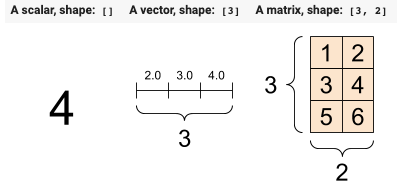

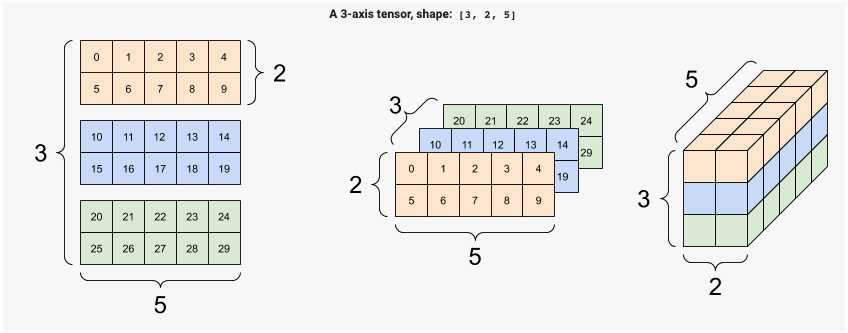

Daha detaylı bilgi için [Tensorflow GitHUB](https://github.com/tensorflow/docs/blob/master/site/en/guide/tensor.ipynb)'a gidebilirsiniz.


# Derin Öğrenme ile "Hello World!"

 X = -1, 0, 1, 2, 3, 4 

---

Y = -3, -1, 1, 3, 5, 7

---



## Sinir Ağı Oluşturma ve Derleme

Tensorflow ile mümkün olan en basit sinir ağını oluşturacağız. 1 nöron, 1 katman ve 1 girişe sahip bu modeli Tensorflow framework içinde olan Keras'ın [Sequential](https://keras.io/api/models/sequential/) sınıfı ile oluşturacağız. Tek bir [katman](https://keras.io/api/layers/core_layers/dense/) sahip ağı aşağıdaki kod ile oluşturalım. Başka layerlar için [Keras](https://keras.io/api/layers/) websitesini ziyaret edebilirsiniz. 

In [ ]:
# Basit Sequential model oluşturma 

model = tf.keras.Sequential([
    keras.layers.Dense(units=1, input_shape=[1])
    ])

Modelimizi oluşturduktan sonra bu modeli derlememiz gerekmektedir. Modelin derlenebilmesi için bize [loss](https://keras.io/api/losses/) ve [optimizer](https://keras.io/api/optimizers/) işlevlerini yerine getirecek fonksiyonlar lazım. 

Loss ya da kayıp dediğimiz işlevin görevi doğru tahminlere karşı tahmin edilen değerleri ölçmek ve ne kadar iyi veya ne kadar kötü tahminlendiğini ölçmektir. 

Optimizer ise modelin üretmiş olduğu ağırlıkları ve bias değerlerini güncelleme işlemini yapan fonksiyonlardır. Optimizer'lar aslında loss fonksiyonunu minimize etmeyi hedefler. Tahminlerin gerçek değerlerden daha az uzak olması sağlandığında modelin öğrenme süreci de hızlanmaktadır. 

In [ ]:
# Modelin derlenmesi 

model.compile(optimizer='sgd', loss='mean_squared_error')

#Optimizer olarak "sgd" yani Stochastic Gradient Descent seçilmiştir. Rastgele örnekler ile ağırlıklar güncellenerek model iyileştirilir. 
#Optimizer olarak kullanılan bir başka fonksiyon da "adam" (Adaptive Moment Estimation) olabilir. Her ikisi de gradient descent kullanmaktadır. 
# Loss fonksiyon olarak ise hata kareler ortalaması kullanılmaktadır. Her zaman pozitif değerlerden oluşup, 0'a yakınlaştıkça iyi tahminlenme yapıldığın

### Veri Besleme, Eğitme ve Tahminleme

In [ ]:
# Veri besleme

# Elimizde 6 tane X ve 6 tane de Y var. Bunlar arasındaki ilişki aslında y = 2x - 1 bir ilişki. 

xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [ ]:
# Model eğitme (training) 

model.fit(xs, ys, epochs=500)

# epoch sayısı ise modelin öğrenmesi için tekrar etme sayısını ifade etmektedir. 

Epoch 1/500
1/1 [==============================] - 0s 379ms/step - loss: 16.5829
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 13.2953
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 10.7038
Epoch 4/500
1/1 [==============================] - 0s 9ms/step - loss: 8.6598
Epoch 5/500
1/1 [==============================] - 0s 7ms/step - loss: 7.0469
Epoch 6/500
1/1 [==============================] - 0s 16ms/step - loss: 5.7731
Epoch 7/500
1/1 [==============================] - 0s 12ms/step - loss: 4.7662
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 3.9694
Epoch 9/500
1/1 [==============================] - 0s 7ms/step - loss: 3.3381
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 2.8369
Epoch 11/500
1/1 [==============================] - 0s 7ms/step - loss: 2.4383
Epoch 12/500
1/1 [==============================] - 0s 7ms/step - loss: 2.1205
Epoch 13/500
1/1 [==============================] - 

In [ ]:
# Tahminleme 

print(model.predict([10.0]))

1/1 [==============================] - 0s 491ms/step
[[18.981312]]


# Bilgisayarla Görü

## Çoklu Sınıflandırma

[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) veri seti ile basit bir sinir ağı eğitilecektir. 

Model ile, 28x28 gri tonlamalı görüntülerden 10 farklı sınıftan (0-9) birisine ait yeni verilecek görüntüde sınıflandırma yapması beklenmektedir. 

| Etiket | Açıklama |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |


In [ ]:
# MNIST veri setini yükleme 

fmnist = tf.keras.datasets.fashion_mnist

In [ ]:
# Eğitim ve Test veri setini ayırıyoruz. 

(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

In [ ]:
# Veri setini inceleme 

data_shape = training_images.shape

print(f"Toplamda {data_shape[0]} eğitim verisi ve shape ({data_shape[1]}, {data_shape[2]})")

data_test_shape = test_images.shape

print(f"Toplamda {data_test_shape[0]} test verisi ve shape ({data_test_shape[1]}, {data_test_shape[2]})")

Toplamda 60000 eğitim verisi ve shape (28, 28)
Toplamda 10000 test verisi ve shape (28, 28)


Etiket: 9
\Gorüntü pixel arrayi:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  85 188 146  79   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 140 202 199 255 144   0   0   0   0  11 135 157   5   0]
 [  0   0   0   0   0   0   0   0   0   0   0   3   0   0 200 187 200 191 255  51   0   0  16 208 227 236  63   0]
 [  0   0   0   0   0   0   0   0   0   0   0 

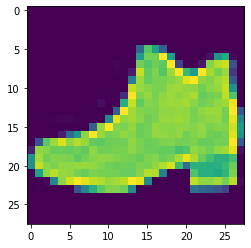

In [ ]:
# Görselleştirme için matplotlib kütüphanenisi yüklüyoruz 
import matplotlib.pyplot as plt

# Veri setinde görselleştirmek istediğimiz veriyi seçiyoruz
index = 15

# Print işleminde kaç karakter gösterileceği 
np.set_printoptions(linewidth=320)

# Etiket ve görüntünün görüntülenmesi
print(f'Etiket: {training_labels[index]}')
print(f'\Gorüntü pixel arrayi:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

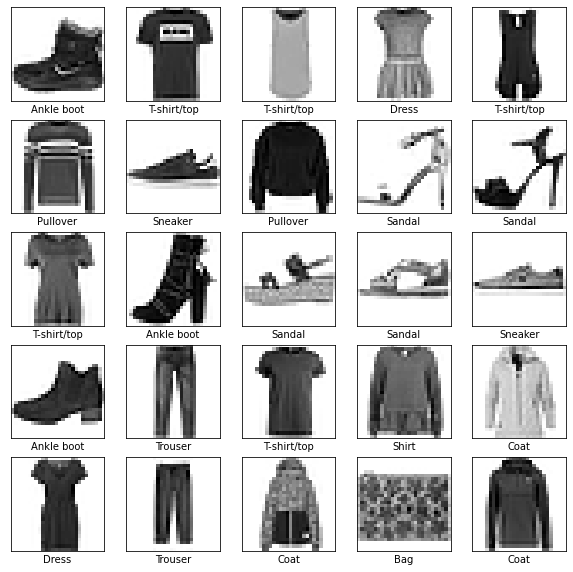

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i]])
plt.show()

In [ ]:
# Piksel değerlerini normalize etme 

training_images  = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Model Kurma 

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

[Sequential](https://keras.io/api/models/sequential/): Yapay sinir ağındaki katman dizisi

[Flatten](https://keras.io/api/layers/reshaping_layers/flatten/): Flatten çok boyutlu girdileri tek boyutlu array haline getirir. Genellikle ilk katmanda gerçekleştirilir ve bir nevi girdi verisi için önişlemedir. 

[Dense](https://keras.io/api/layers/core_layers/dense/): Nöron katmanı ekleme

Her bir nöron katmanı aslında tam olarak nasıl hareket etmesi için bir [aktivasyon fonksiyonuna](https://keras.io/api/layers/activations/) ihtiyaç duymaktadır. Birçok aktivasyon fonksiyon seçeneği vardır. Bu model için [ReLU](https://keras.io/api/layers/activations/#relu-function) seçilmiştir. ReLU eğer x > 0: x versini diğer 0 döndürmektedir. Yani bir sonraki katmanda alınacak değer ya 0 olacak ya da daha büyük değerleri alacaktır. 

[Softmax](https://keras.io/api/layers/activations/#softmax-function) fonksiyonu ise değerlerin toplamını 1'e eşit olacak şekilde belirlenmiş olan sınıf sayısına ölçeklendirir. Bizim örneğimizde 10 tane sınıf olduğu için her bir verinin 10 tane sınıfa ait toplamı 1 olacak şekilde değerleri üretecektir. 

In [ ]:
# Model derleme 

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Model eğitimi 

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6246 - accuracy: 0.8016
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3808 - accuracy: 0.8623
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3380 - accuracy: 0.8763
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3126 - accuracy: 0.8860
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2946 - accuracy: 0.8928


Elimizdeki modelin accuracy yani doğruluk oranı %89 oranında gerçekleşmiştir. Tabii ki bu daha önce görmediği veriler üzerinde gerçekleşen değerlendirmeler değildir. Daha önce hiç eğitimde görmediği veriler üzerinde modelin performansının ölçülmesi gerekmektedir. 

In [ ]:
# Model performansını ölçme 

model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 3.2898 - accuracy: 0.1000


[3.2897589206695557, 0.10000000149011612]

In [ ]:
classifications = model.predict(test_images)


313/313 [==============================] - 1s 2ms/step


[0.         0.         0.         0.         0.99999994 0.         0.         0.         0.         0.        ]

Coat



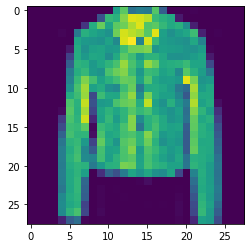

In [ ]:
print(classifications[10])
print()
print(class_names[np.argmax(classifications[10])])
print()
plt.imshow(test_images[10])

| Etiket | Açıklama |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |


## Websiteler ve Kaynaklar



*   [tensorflow.org](https://www.tensorflow.org)
*   [tensorflow forum](https://discuss.tensorflow.org)
*   [tensorflow github](https://github.com/tensorflow)
*   [tensorflow veri yükleme tutorial](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/load_data/images.ipynb)






